# Lecture03 - Understanding Computational Modeling 
# Model Fitting: Linear regression with MSE

**Content creators**: Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil with help from Byron Galbraith

**Content reviewers**: Lina Teichmann, Saeed Salehi, Patrick Mineault,  Ella Batty, Michael Waskom





___
#Tutorial Objectives

This is Tutorial 1 of a series on fitting models to data. We start with simple linear regression, using least squares optimization (Tutorial 1) and Maximum Likelihood Estimation (Tutorial 2). We will use bootstrapping to build confidence intervals around the inferred linear model parameters (Tutorial 3). We'll finish our exploration of regression models by generalizing to multiple linear regression and polynomial regression (Tutorial 4). We end by learning how to choose between these various models. We discuss the bias-variance trade-off (Tutorial 5) and Cross Validation for model selection (Tutorial 6).

In this tutorial, we will learn how to fit simple linear models to data.
- Learn how to calculate the mean-squared error (MSE) 
- Explore how model parameters (slope) influence the MSE
- Learn how to find the optimal model parameter using least-squares optimization

---

**acknowledgements:** 
- we thank Eero Simoncelli, much of today's tutorials are inspired by exercises asigned in his mathtools class.

---
# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Helper functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
      x (ndarray): observed x values
  y (ndarray): observed y values
  y_hat (ndarray): predicted y values

  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {mse(x, y, theta_hat):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

---
# Section 1: Mean Squared Error (MSE)

**Linear least squares regression** is an old but gold  optimization procedure that we are going to use for data fitting. Least squares (LS) optimization problems are those in which the objective function is a quadratic function of the
parameter(s) being optimized.

Suppose you have a set of measurements, $y_{n}$ (the "dependent" variable) obtained for different input values, $x_{n}$ (the "independent" or "explanatory" variable). Suppose we believe the measurements are proportional to the input values, but are corrupted by some (random) measurement errors, $\epsilon_{n}$, that is:

$$y_{n}= \theta x_{n}+\epsilon_{n}$$

for some unknown slope parameter $\theta.$ The least squares regression problem uses **mean squared error (MSE)** as its objective function, it aims to find the value of the parameter $\theta$ by minimizing the average of squared errors:

\begin{align}
\min _{\theta} \frac{1}{N}\sum_{n=1}^{N}\left(y_{n}-\theta x_{n}\right)^{2}
\end{align}

We will now explore how MSE is used in fitting a linear regression model to data. For illustrative purposes, we will create a simple synthetic dataset where we know the true underlying model. This will allow us to see how our estimation efforts compare in uncovering the real model (though in practice we rarely have this luxury).

First we will generate some noisy samples $x$ from [0, 10) along the line $y = 1.2x$ as our dataset we wish to fit a model to.

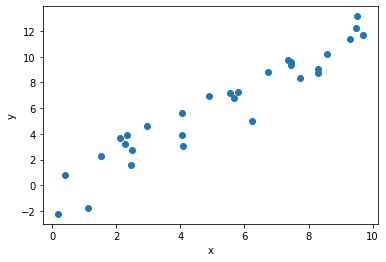

In [3]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Now that we have our suitably noisy dataset, we can start trying to estimate the underlying model that produced it. We use MSE to evaluate how successful a particular slope estimate $\hat{\theta}$ is for explaining the data, with the closer to 0 the MSE is, the better our estimate fits the data.

## Exercise 1: Compute MSE

In this exercise you will implement a method to compute the mean squared error for a set of inputs $x$, measurements $y$, and slope estimate $\hat{\theta}$. We will then compute and print the mean squared error for 3 different choices of theta

In [6]:
def mse(x, y, theta_hat):
  
    """
    Compute the mean squared error

    Args:
        x (ndarray): An array of shape (samples,) that contains the input values.
        y (ndarray): An array of shape (samples,) that contains the corresponding
        measurement values to the inputs.
        theta_hat (float): An estimate of the slope parameter

    Returns:
        float: The mean squared error of the data with the estimated parameter.
    """
    ####################################################
    ## TODO for students: compute the mean squared error
    # Fill out function and remove
#     raise NotImplementedError("Student exercise: compute the mean squared error")
    ####################################################

    # Compute the estimated y
    y_hat = theta_hat * x

    # Compute mean squared error
    mse = np.mean((y-y_hat)**2)

    return mse


# Uncomment below to test your function
theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
    print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


The result should be:

theta_hat of 0.75 has an MSE of 9.08\
theta_hat of 1.0 has an MSE of 3.0\
theta_hat of 1.5 has an MSE of 4.52





We see that $\hat{\theta} = 1.0$ is our best estimate from the three we tried. Looking just at the raw numbers, however, isn't always satisfying, so let's visualize what our estimated model looks like over the data. 



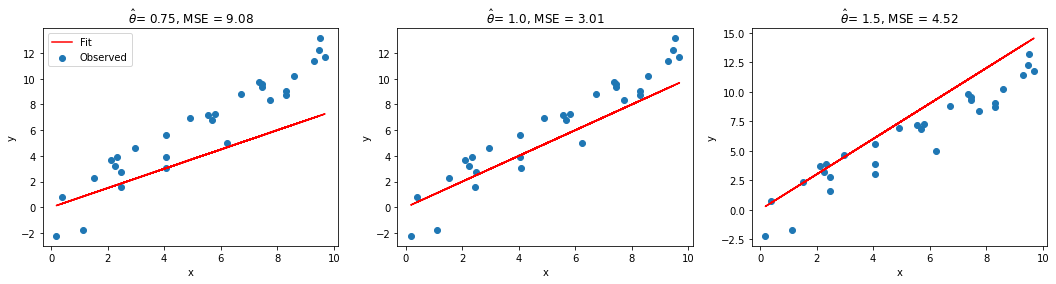

In [7]:
#@title

#@markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

## Interactive Demo: MSE Explorer

Using an interactive widget, we can easily see how changing our slope estimate changes our model fit. We display the **residuals**, the differences between observed and predicted data, as line segments between the data point (observed response) and the corresponding predicted response on the model fit line.

In [8]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)

NameError: name 'widgets' is not defined

While visually exploring several estimates can be instructive, it's not the most efficient for finding the best estimate to fit our data. Another technique we can use is choose a reasonable range of parameter values and compute the MSE at several values in that interval. This allows us to plot the error against the parameter value (this is also called an **error landscape**, especially when we deal with more than one parameter). We can select the final $\hat{\theta}$ ($\hat{\theta}_{MSE}$) as the one which results in the lowest error.

In [ ]:
# @title

# @markdown Execute this cell to loop over theta_hats, compute MSE, and plot results

# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

We can see that our best fit is $\hat{\theta}=1.18$ with an MSE of 1.45. This is quite close to the original true value $\theta=1.2$!


---
# Section 2: Least-squares optimization


While the approach detailed above (computing MSE at various values of $\hat\theta$) quickly got us to a good estimate, it still relied on evaluating the MSE value across a grid of hand-specified values. If we didn't pick a good range to begin with, or with enough granularity, we might miss the best possible estimator. Let's go one step further, and instead of finding the minimum MSE from a set of candidate estimates, let's solve for it analytically.

We can do this by minimizing the cost function. Mean squared error is a convex objective function, therefore we can compute its minimum using calculus. Please see video or appendix for this derivation! After computing the minimum, we find that:

\begin{align}
\hat\theta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}

This is known as solving the normal equations. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

### Exercise 2: Solve for the Optimal Estimator

In this exercise, you will write a function that finds the optimal $\hat{\theta}$ value using the least squares optimization approach (the equation above) to solve MSE minimization. It shoud take arguments $x$ and $y$ and return the solution $\hat{\theta}$.

We will then use your function to compute $\hat{\theta}$ and plot the resulting prediction on top of the data. 

In [9]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  ################################################################################
  ## TODO for students: solve for the best parameter using least squares
  # Fill out function and remove
#   raise NotImplementedError("Student exercise: solve for theta_hat using least squares")
  ################################################################################

  # Compute theta_hat analytically
  theta_hat = (x.T @ y) / (x.T @ x)

  return theta_hat

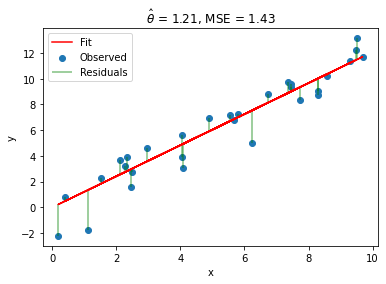

In [10]:
# Uncomment below to test your function
theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)


*Example output:*

<img alt='Solution hint' align='left' width=558 height=414 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/NMA2020/tutorials/W1D3_ModelFitting/static/W1D3_Tutorial1_Solution_7a89ba24_0.png>



We see that the analytic solution produces an even better result than our grid search from before, producing $\hat{\theta} = 1.21$ with MSE = 1.43!

---
# Summary

- Linear least squares regression is an optimization procedure that can be used for data fitting:
    - Task: predict a value for $y$ given $x$
    - Performance measure: $\textrm{MSE}$
    - Procedure: minimize $\textrm{MSE}$ by solving the normal equations
- **Key point**: We fit the model by defining an *objective function* and minimizing it. 
- **Note**: In this case, there is an *analytical* solution to the minimization problem and in practice, this solution can be computed using *linear algebra*. This is *extremely* powerful and forms the basis for much of numerical computation throughout the sciences.

---
# Appendix

## Least Squares Optimization Derivation

We will outline here the derivation of the least squares solution.

We first set the derivative of the error expression with respect to $\theta$ equal to zero, 

\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(y_i - \theta x_i)^2 = 0 \\
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \theta x_i) = 0
\end{align}

where we used the chain rule. Now solving for $\theta$, we obtain an optimal value of:

\begin{align}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{align}

Which we can write in vector notation as:

\begin{align}
\hat\theta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}


This is known as solving the *normal equations*. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

# Model Fitting: Linear regression with MLE

**Content creators**: Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil  with help from Byron Galbraith

**Content reviewers**: Lina Teichmann, Madineh Sarvestani, Patrick Mineault, Ella Batty, Michael Waskom


---
#Tutorial Objectives

This is Tutorial 2 of a series on fitting models to data. We start with simple linear regression, using least squares optimization (Tutorial 1) and Maximum Likelihood Estimation (Tutorial 2). We will use bootstrapping to build confidence intervals around the inferred linear model parameters (Tutorial 3). We'll finish our exploration of regression models by generalizing to multiple linear regression and polynomial regression (Tutorial 4). We end by learning how to choose between these various models. We discuss the bias-variance trade-off (Tutorial 5) and Cross Validation for model selection (Tutorial 6).

In this tutorial, we will use a different approach to fit linear models that incorporates the random 'noise' in our data.
- Learn about probability distributions and probabilistic models
- Learn how to calculate the likelihood of our model parameters
- Learn how to implement the maximum likelihood estimator, to find the model parameter with the maximum likelihood



---
# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [1]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/NMA2020/nma.mplstyle")

NameError: name 'plt' is not defined

In [15]:
#@title Helper Functions
def plot_density_image(x, y, theta, sigma=1, ax=None):
  """ Plots probability distribution of y given x, theta, and sigma

  Args:

    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta (float): Slope parameter
    sigma (float): standard deviation of Gaussian noise

  """

  # plot the probability density of p(y|x,theta)
  if ax is None:
    fig, ax = plt.subplots()

  xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
  ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
  xx = np.linspace(xmin, xmax, 50)
  yy = np.linspace(ymin, ymax, 50)

  surface = np.zeros((len(yy), len(xx)))
  for i, x_i in enumerate(xx):
    surface[:, i] = stats.norm(theta * x_i, sigma).pdf(yy)

  ax.set(xlabel='x', ylabel='y')

  return ax.imshow(surface, origin='lower', aspect='auto', vmin=0, vmax=None,
            cmap=plt.get_cmap('Wistia'),
            extent=[xmin, xmax, ymin, ymax])



def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter.

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  theta_hat = (x.T @ y) / (x.T @ x)
  return theta_hat

---
# Section 1: Maximum Likelihood Estimation (MLE)


In the previous tutorial we made the assumption that the data was drawn from a linear relationship with noise added, and found an effective approach for estimating model parameters based on minimizing the mean squared error.

In that case we treated the noise as simply a nuisance, but what if we factored it directly into our model?

Recall our linear model:

\begin{align}
y = \theta x + \epsilon.
\end{align}

The noise component $\epsilon$ is often modeled as a random variable drawn from a Gaussian distribution (also called the normal distribution).

The Gaussian distribution is described by its [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf)
\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
\end{align}

and is dependent on two parameters: the mean $\mu$ and the variance $\sigma^2$. We often consider the noise signal to be Gaussian "white noise", with zero mean and unit variance:

\begin{align}
\epsilon \sim \mathcal{N}(0, 1).
\end{align}



## Interactive Demo: Gaussian Distribution Explorer

Use the explorer widget below to see how varying the $\mu$ and $\sigma$ parameters change the location and shape of the samples.

In [16]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact(mu=widgets.FloatSlider(0.0, min=-2.0, max=2.0),
                  sigma=widgets.FloatSlider(1.0, min=0.5, max=2.0))
def plot_normal_dist(mu=0, sigma=1):

  # Generate pdf & samples from normal distribution with mu/sigma
  rv = stats.norm(mu, sigma)
  x = np.linspace(-5, 5, 100)
  y = rv.pdf(x)
  samples = rv.rvs(1000)

  # Plot
  fig, ax = plt.subplots()
  ax.hist(samples, 20, density=True, color='g', histtype='stepfilled', alpha=0.8,
          label='histogram')
  ax.plot(x, y, color='orange', linewidth=3, label='pdf')
  ax.vlines(mu, 0, rv.pdf(mu), color='y', linewidth=3, label='$\mu$')
  ax.vlines([mu-sigma, mu+sigma], 0, rv.pdf([mu-sigma, mu+sigma]), colors='red',
            color='b', linewidth=3, label='$\sigma$')
  ax.set(xlabel='x', ylabel='probability density', xlim=[-5, 5], ylim=[0, 1.0])
  ax.legend()

NameError: name 'widgets' is not defined


## Section 1.1: Probabilistic Models

Now that we have a model of our noise component $\epsilon$ as random variable, how do we incorporate this back into our original linear model from before? Consider again our simplified model $y = \theta x + \epsilon$ where the noise has zero mean and unit variance $\epsilon \sim \mathcal{N}(0, 1)$. We can now also treat $y$ as a random variable drawn from a Gaussian distribution where $\mu = \theta x$ and $\sigma^2 = 1$:

\begin{align}
y \sim \mathcal{N}(\theta x, 1)
\end{align}

which is to say that the probability of observing $y$ given $x$ and parameter $\theta$ is
\begin{align}
p(y|x,\theta) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(y-\theta x)^2}
\end{align}

---

Let's revisit our original sample dataset where the true underlying model has $\theta = 1.2$.

In [2]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence

np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta * x + noise

This time we can plot the density of $p(y|x,\theta=1.2)$ and see how $p(y)$ changes for different values of $x$.

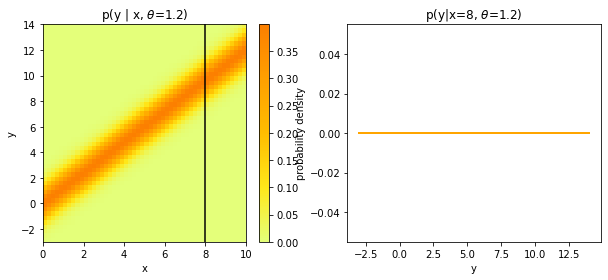

In [17]:
#@title
#@markdown Execute this cell to visualize p(y|x, theta=1.2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Invokes helper function to generate density image plots from data and parameters
im = plot_density_image(x, y, 1.2, ax=ax1)
plt.colorbar(im, ax=ax1)
ax1.axvline(8, color='k')
ax1.set(title=r'p(y | x, $\theta$=1.2)')

# Plot pdf for given x
ylim = ax1.get_ylim()
yy = np.linspace(ylim[0], ylim[1], 50)
ax2.plot(yy, stats.norm(theta * 8, 1).pdf(yy), color='orange', linewidth=2)
ax2.set(
    title=r'p(y|x=8, $\theta$=1.2)',
    xlabel='y',
    ylabel='probability density');

## Section 1.2: Likelihood Estimation

Now that we have our probabilistic model, we turn back to our original challenge of finding a good estimate for $\theta$ that fits our data. Given the inherent uncertainty when dealing in probabilities, we talk about the [likelihood](https://en.wikipedia.org/wiki/Likelihood_function) that some estimate $\hat \theta$ fits our data. The likelihood function $\mathcal{L(\theta)}$ is equal to the probability density function parameterized by that $\theta$:

\begin{align}
\mathcal{L}(\theta|x,y) = p(y|x,\theta) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(y-\theta x)^2}
\end{align}

### Exercise 1: Likelihood Function

In this exercise you will implement the likelihood function $\mathcal{L}(\theta|x,y)$ for our linear model where $\sigma = 1$.

After implementing this function, we can produce probabilities that our estimate $\hat{\theta}$ generated the provided observations. We will try with one of the samples from our dataset.

TIP: Use `np.exp` and `np.sqrt` for the exponential and square root functions, respectively.

In [5]:
def likelihood(theta_hat, x, y):
  """The likelihood function for a linear model with noise sampled from a
    Gaussian distribution with zero mean and unit variance.

  Args:
    theta_hat (float): An estimate of the slope parameter.
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray: the likelihood values for the theta_hat estimate
  """
  sigma = 1
  ##############################################################################
  ## TODO for students: implement the likelihood function
  # Fill out function and remove
#   raise NotImplementedError("Student exercise: implement the likelihood function")
  ##############################################################################

  # Compute Gaussian likelihood
  pdf = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(y-theta_hat*x)**2/(2*sigma**2))

  return pdf

In [6]:

# Uncomment below to test your function
print(likelihood(1.0, x[1], y[1]))

0.11344443599846923


In [12]:
LK = []
for theta in np.arange(-10,10,0.1):
    for i in range(len(x)):
        LK[(theta,i)] = likelihood(1.0, x[i], y[i])

TypeError: list indices must be integers or slices, not tuple

In [8]:
LK

[0.006602104548618324,
 0.11344443599846923,
 0.12027394698078417,
 0.29207641415394775,
 0.36441871927866076,
 0.2315619661795187,
 0.11096743090475027,
 0.06853602084753403,
 0.38461297360488855,
 0.04929510458222329,
 0.0005583251781779751,
 0.05181210317577212,
 0.021993788218087947,
 0.10577904531714467,
 0.395141721992978,
 0.1867320764855962,
 0.10165533825092198,
 0.046011259471723076,
 0.12240996213022803,
 0.2049866442636585,
 0.2705594140839129,
 0.254434840748879,
 0.36985751388383475,
 0.13974630026763357,
 0.30720431425992806,
 0.3242715769755181,
 0.008910522441379933,
 0.02119879946947837,
 0.048233068213100444,
 0.042271983470439464]

We should see that $\mathcal{L}(\theta=1.0|x=2.1,y=3.7) \approx 0.11$. So far so good, but how does this tell us how this estimate is better than any others?

When dealing with a set of data points, as we are with our dataset, we are concerned with their joint probability -- the likelihood that all data points are explained by our parameterization. Since we have assumed that the noise affects each output independently, we can factorize the likelihood, and write:

\begin{align}
\mathcal{L}(\theta|X,Y) = \prod_{i=1}^N \mathcal{L}(\theta|x_i,y_i),
\end{align}

where we have $N$ data points $X = \{x_1,...,x_N\}$ and $Y = \{y_1,...,y_N\}$.

In practice, such a product can be numerically unstable. Indeed multiplying small values together can lead to [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow), the situation in which the digital representation of floating point number reaches its limit. This problem can be circumvented by taking the logarithm of the likelihood because the logarithm transforms products into sums:

\begin{align}
\operatorname{log}\mathcal{L}(\theta|X,Y) = \sum_{i=1}^N \operatorname{log}\mathcal{L}(\theta|x_i,y_i)
\end{align}

We can take the sum of the log of the output of our `likelihood` method applied to the full dataset to get a better idea of how different $\hat\theta$ compare. We can also plot the different distribution densities over our dataset and see how they line up qualitatively.

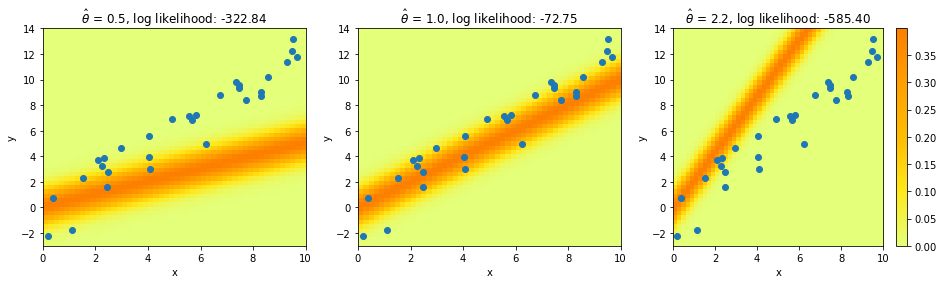

In [18]:
#@title
#@markdown Execute this cell to visualize different distribution densities
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for theta_hat, ax in zip(theta_hats, axes):
  ll = np.sum(np.log(likelihood(theta_hat, x, y)))  # log likelihood
  im = plot_density_image(x, y, theta_hat, ax=ax)
  ax.scatter(x, y)
  ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
plt.colorbar(im, ax=ax);

Using the log likelihood calculation, we see that $\mathcal{L}(\theta=1.0) > \mathcal{L}(\theta=0.5) > \mathcal{L}(\theta=2.2)$.

This is great: now we have a way to compare estimators based on likelihood. But like with the MSE approach, we want an analytic solution to find the best estimator. In this case, we want to find the estimator that maximizes the likelihood.


## Section 1.3: Finding the Maximum Likelihood Estimator

We want to find the parameter value $\hat\theta$ that makes our data set most likely:

\begin{align}
\hat{\theta}_{\textrm{MLE}} = \underset{\theta}{\operatorname{argmax}} \mathcal{L}(\theta|X,Y) 
\end{align}

We discussed how taking the logarithm of the likelihood helps with numerical stability, the good thing is that it does so without changing the parameter value that maximizes the likelihood. Indeed, the $\textrm{log}()$ function is *monotonically increasing*, which means that it preserves the order of its inputs. So we have:

\begin{align}
\hat{\theta}_{\textrm{MLE}} = \underset{\theta}{\operatorname{argmax}} \sum_{i=1}^m \textrm{log} \mathcal{L}(\theta|x_i,y_i) 
\end{align}

Now substituting our specific likelihood function and taking its logarithm, we get:
\begin{align}
\hat{\theta}_{\textrm{MLE}} = \underset{\theta}{\operatorname{argmax}} [-\frac{N}{2} \operatorname{log} 2\pi\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i-\theta x_i)^2].
\end{align}

Note that maximizing the log likelihood is the same as minimizing the negative log likelihood (in practice optimization routines are developed to solve minimization not maximization problems). Because of the convexity of this objective function, we can take the derivative of our negative log likelihhood, set it to 0, and solve - just like our solution to minimizing MSE.

\begin{align}
\frac{\partial\operatorname{log}\mathcal{L}(\theta|x,y)}{\partial\theta}=\frac{1}{\sigma^2}\sum_{i=1}^N(y_i-\theta x_i)x_i = 0
\end{align}

This looks remarkably like the equation we had to solve for the optimal MSE estimator, and, in fact, we arrive to the exact same solution!

\begin{align}
\hat{\theta}_{\textrm{MLE}} = \hat{\theta}_{\textrm{MSE}} = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{align}

In [19]:
# Compute theta_hat_MLE
theta_hat_mle = (x @ y) / (x @ x)

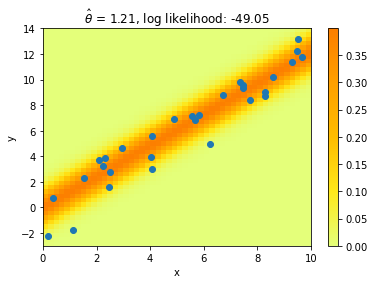

In [20]:
#@title
#@markdown Execute this cell to visualize density with theta_hat_mle

# Plot the resulting distribution density
fig, ax = plt.subplots()
ll = np.sum(np.log(likelihood(theta_hat_mle, x, y))) # log likelihood
im = plot_density_image(x, y, theta_hat_mle, ax=ax)
plt.colorbar(im, ax=ax);
ax.scatter(x, y)
ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat_mle:.2f}, log likelihood: {ll:.2f}');

---
# Summary

- Likelihood vs probability
    - $\mathcal{L}(\theta|x, y) = p(y|\theta, x)$
    - $p(y|\theta, x)$ -> "probability of observing the response $y$ given parameter $\theta$ and input $x$"
    - $\mathcal{L}(\theta|x, y)$ -> "likelihood model that parameters $\theta$ produced response $y$ from input $x$"
- Log-likelihood maximization
    - We take the $\textrm{log}$ of the likelihood function for computational convenience
    - The parameters $\theta$ that maximize $\textrm{log}\mathcal{L}(\theta|x, y)$ are the model parameters that maximize the probability of observing the data.
- **Key point**:
  - the log-likelihood is a flexible cost function, and is often used to find model parameters that best fit the data.

---
# Appendix

We can also see $\mathrm{p}(\mathrm{y} | \mathrm{x}, \theta)$ as a function of $x$. This is the stimulus likelihood function, and it is useful in case we want to decode the input $x$ from observed responses $y$. This is what is relevant from the point of view of a neuron that does not have access to the outside world and tries to infer what's out there from the responses of other neurons!



